# Importing libraries 

In [1]:
import nltk 
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import re, codecs
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

import time

import seaborn as sns

# Simple Stemming

In [2]:
def comparison(word1, word2):
    length = len(word2) if len(word1) > len(word2) else len(word1)
    result = ''
    for i in range(length):
        if(word1[i] == word2[i]):
            result = result + word1[i]
        else:
            break
    return result

def stemming_kazakh(docin, doc):
    alldocin = docin.split(' ')
    docin = doc.split(' ')
    result = []
    for i in range(len(alldocin)):
        for j in range(len(docin)):
            s = comparison(alldocin[i], docin[j])
            if(len(s) > 3):
                docin[j] = s
    
    return " ".join(str(x) for x in docin)

def clean_all_datas(data_list):
    merged = ' '.join(data_list[:100])
    cleaned = []
    iter = 1
    length = len(data_list)
    for i in data_list:
        cleaned.append(stemming_kazakh(merged, i))
        print(iter,'/',length)
        iter += 1
    return cleaned

# Cleaning data from unuseful symbols

In [3]:
def cleaning_data(code_data):
    sentences = []
    for line in code_data:
        stripped = re.sub('[^А-Я,а-я,Ә,І,Ң,Ғ,Ү,Ұ,Қ,Ө,Һ,ә,і,ə,ң,ғ,ү,ұ,қ,ө,һ]', ' ', line)
        stripped = re.sub('_', '', stripped)
        stripped = re.sub('\s+', ' ', stripped) 
        senten = [t for t in stripped.split(line) if t != ' ']
        if(senten != []):
            sentences.append(' '.join(senten).lower())
    return sentences

In [ ]:
pathneut = codecs.open("dataset/neutral.txt", "r", encoding="utf-8")
data_list = cleaning_data(pathneut)

In [ ]:
len(data_list)

In [ ]:
tic = time.perf_counter()
data_cleaned = clean_all_datas(data_list)
toc = time.perf_counter()
print(f"Processing {toc - tic:0.4f} seconds")

# Writing and Reading

with open('stemmed.txt','w', encoding="utf-8") as f:
  f.write('\n'.join(data_cleaned))

In [4]:
data_cleaned = []
with open('stemmed.txt','r', encoding="utf-8") as f:
    data_cleaned = [line.replace('\n', '') for line in f]

# Visualization

In [5]:
data_cleaned[0:5]

['пайғамбар арты еру, бұл бізд ең баст мақсат ал, ғалым сол мақсат жетуге себе бола құра муфти әбу әли әл ханафи ',
 'күмәнданған кезде шоқыну керек деген сияқты сөзд діннен шыға ма жауап шоқыну бұл күпірлік сонд шоқыну керек деген сөз де күпірлік бола біра адам шоқыну деген сөзд мағынасын біле деген шарт адам күпірлік сөзі айтты біра біз оны кәпір демейміз деген сөз келе жағдай жарамды бола егер адам өлім қорқытып, оны мәжбүрлесе егер адам бұл кезде ақыл айыр болс фана халіне түске кейбір сопыл сияқты адам сөзд мағынасын түсі мысалы өзі өте нашар біле тілд сөйлесе адам жаңылысып, шатасып қалды алла тағала бізд күпірлік сақта муфти әбу әли әл ханафи хафиза ',
 'сұра ассал алай уа ра мату уа баракату құптан намаз мешіт имам оқып ал тара намаз басқа елден алып келі қари оқыса, ол қари ақша беру бола ма жауап уа алай уа ра мату уа баракату жоқ, беру болма муфти әбу әли әл ханафи хафиза ',
 'сұра егер біреу не үшін намаз оқу керек , деп сұра не деп жауап берг дұрыс жауап себе алла тағала ə

In [6]:
def get_gram(data_list, n):
    vectorizer = CountVectorizer(ngram_range =(n, n), stop_words=nltk.corpus.stopwords.words('kazakh'))
    #vectorizer = TfidfVectorizer(ngram_range = (n,n))
    X = vectorizer.fit_transform(data_list)
    features = (vectorizer.get_feature_names())
    sums = X.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0,col] ))
    ranking = pd.DataFrame(data1, columns = ['term','rank'])
    words = (ranking.sort_values('rank', ascending = False))
    return  words

In [7]:
def plotting_ngram(gram_df, n):
    gram = pd.DataFrame(gram_df[:n])
    d = gram.set_index('term').T.to_dict('rank')[:1]

    G = nx.Graph()
    
    for k, v in d[0].items():
        G.add_edge(k.split()[0], k.split()[1], weight=(v * 10))

    fig, ax = plt.subplots(figsize=(16, 12))

    pos = nx.spring_layout(G, k=2)

    nx.draw_networkx(G, pos,
                     font_size=16,
                     width=3,
                     edge_color='blue',
                     node_color='red',
                     with_labels = False,
                     ax=ax)

    for key, value in pos.items():
        x, y = value[0]+.135, value[1]+.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='purple', alpha=0.25),
                horizontalalignment='center', fontsize=10)
    
    plt.show()

In [9]:
bigram_df = get_gram(data_cleaned, 2)
print ("\n\nWords head : \n", bigram_df.head(20))

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))




Words head : 
                     term  rank
70386            сонд ақ   638
43060        иман келтір   368
4316         алла тағала   359
376            адам бала   183
29297   ерекше мейірімді   176
85756        шын мәнінде   165
70359          сонд алла   159
18454           бір бірі   122
36352           жер жүзі   119
3652           алла атым   117
78488         тура жолға   111
102592          әр нәрсе   111
65501          расы алла   110
3925           алла жолы   109
34487          жасы шыға   102
92220         қарсы болғ   101
7478          аса қамқор    98
93726        қиямет күні    98
53855     мейірімді алла    98
16177            болс да    98


In [10]:
bigram_df

,term,rank
70386,сонд ақ,638
43060,иман келтір,368
4316,алла тағала,359
376,адам бала,183
29297,ерекше мейірімді,176
...,...,...
39212,жүгі айта,1
39211,жүгі адам,1
39210,жүгеріңіздің жақсы,1
39209,жүгеріме де,1


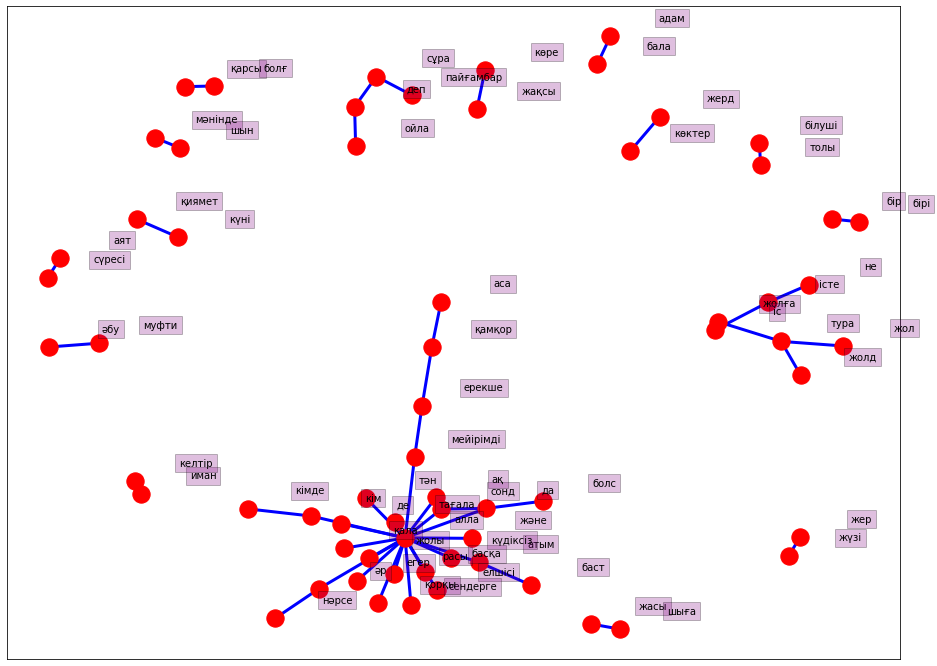

In [11]:
plotting_ngram(bigram_df, 50)

In [17]:
top_df = pd.DataFrame(bigram_df[:20])
top_df.columns=["Сөз", "Барлық документтердегі жиілігі"]

[Text(0, 0, 'сонд ақ'),
 Text(0, 0, 'иман келтір'),
 Text(0, 0, 'алла тағала'),
 Text(0, 0, 'адам бала'),
 Text(0, 0, 'ерекше мейірімді'),
 Text(0, 0, 'шын мәнінде'),
 Text(0, 0, 'сонд алла'),
 Text(0, 0, 'бір бірі'),
 Text(0, 0, 'жер жүзі'),
 Text(0, 0, 'алла атым'),
 Text(0, 0, 'тура жолға'),
 Text(0, 0, 'әр нәрсе'),
 Text(0, 0, 'расы алла'),
 Text(0, 0, 'алла жолы'),
 Text(0, 0, 'жасы шыға'),
 Text(0, 0, 'қарсы болғ'),
 Text(0, 0, 'аса қамқор'),
 Text(0, 0, 'қиямет күні'),
 Text(0, 0, 'мейірімді алла'),
 Text(0, 0, 'болс да')]

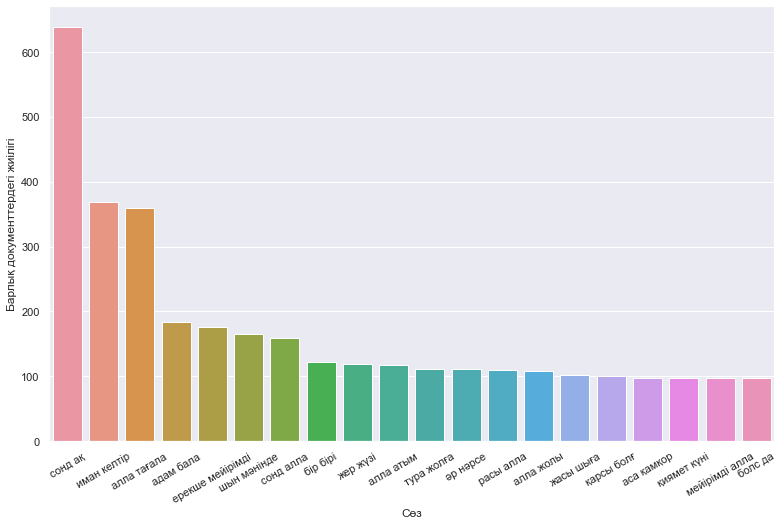

In [19]:
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Сөз", y="Барлық документтердегі жиілігі", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [12]:
trigram_df = get_gram(data_cleaned, 3)
print ("\n\nWords head : \n", trigram_df.head(20))

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))




Words head : 
                                term  rank
4836                 алла атым баст    96
40426         ерекше мейірімді алла    95
117600      қамқор ерекше мейірімді    94
10976             аса қамқор ерекше    93
71075           мейірімді алла атым    91
91879                  сонд ақ алла    77
128527                   әбу әли әл    51
45864   жарылқаушы ерекше мейірімді    50
130196                әли әл ханафи    50
72101                 муфти әбу әли    49
112642                 ізгі іс істе    47
7590                  алла әр нәрсе    42
101790              тура жолға сала    39
92543              сонд иман келтір    38
69450                  ли əл ханафи    38
60766                келтір ізгі іс    38
57629              иман келтір ізгі    38
6274                 алла разы болс    37
4976               алла басқа тәңір    37
62731       коментке есіміңді қалды    35


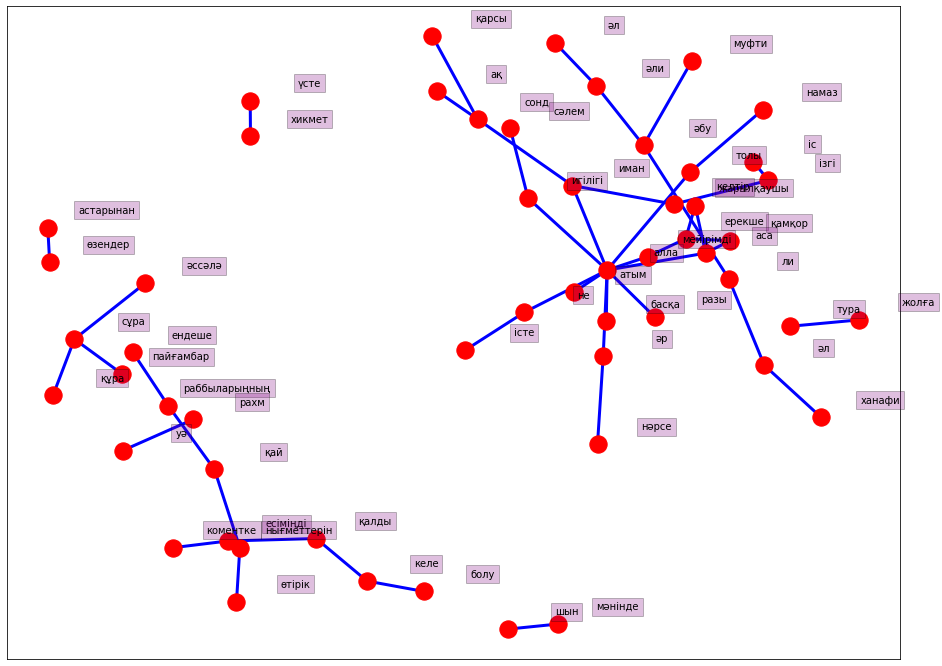

In [13]:
plotting_ngram(trigram_df, 50)